In [16]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from math import ceil, floor, log, sqrt

# Parameters
budget = 10**8
alpha = 0.1
a = 0.8
b = 1

a_hat=a
b_hat=b

def estimate_a_b(p_hat_list):
    m = len(p_hat_list)

    min_p = np.min(p_hat_list)
    max_p = np.max(p_hat_list)
    
    # Bias-corrected estimates of a and b
    a_hat = (m + 1)/m * min_p - (1/m) * max_p
    b_hat = (m + 1)/m * max_p - (1/m) * min_p

    return max([0, a_hat]), min([b_hat, 1])

# Check validity of epsilon
def check_validity_condition(eps, alpha, budget, a_hat=0, b_hat=1, return_val=False):
    b_minus_a = b_hat - a_hat
    
    m_star = ceil(abs(log(alpha)) / abs(log(1 - (eps / b_minus_a ) )))
    r_star = budget / m_star
    type_1_error = (1 - (eps - np.sqrt(np.log(r_star) / r_star)) / (b_hat - a_hat))**m_star + 2 * (m_star / np.sqrt(r_star))

    if return_val:
        return type_1_error < alpha, type_1_error
    else:
        return type_1_error < alpha

# Check validity of epsilon
# def check_validity_condition_budget_aware(eps, alpha, budget, a_hat=None, b_hat=None, return_val=False):
#     b_minus_a = b_hat - a_hat
    
#     m_star = ceil(abs(log(alpha)) / abs(log(1 - (eps / b_minus_a ) )))
#     min_m_star = 1000
#     r_star = budget / min_m_star
    

#     print(r_star)

#     if a_hat is None and b_hat is None:
#         a_hat, b_hat = estimate_min_ax(m_star, r_star, a, b)
    
    
#     type_1_error = (1 - (eps - np.sqrt(np.log(r_star) / r_star)) / (b_hat - a_hat))**m_star + 2 * (m_star / np.sqrt(r_star))

#     if return_val:
#         return type_1_error < alpha, type_1_error
#     else:
#         return type_1_error < alpha


# Filter epsilon values
eps_search_list = np.arange(0.005, 0.05, 0.002)
validity_check_list = [check_validity_condition(eps, alpha, budget, a_hat, b_hat) for eps in eps_search_list]
valid_epsilon_list = [eps for eps, k in zip(eps_search_list, validity_check_list) if k]
print(valid_epsilon_list)


def estimate_min_max(m, r, a, b):
    p_list = np.random.uniform(a, b, size=m)
    p_hat_list = [np.mean(np.random.binomial(1, p, r)) for p in p_list]
    
# Power lower bound estimation
def calculate_approximate_power(eps, m, r, a=0, b=1, p_hat_list=None):
    if not p_hat_list:
        p_list = np.random.uniform(a, b, size=m)
        p_hat_list = [np.mean(np.random.binomial(1, p, r)) for p in p_list]
        
    p_hat_max = np.max(p_hat_vec)
    p_hat_min = np.min(p_hat_vec)
    p_hat_diff = p_hat_max - p_hat_min
    big_q = eps + sqrt(log(r) / r)
    if p_hat_diff == 0:
        return -np.inf
    res = (2 / (1 - p_hat_diff)) * ((1 - bigq / p_hat_diff)**m - 1) * bigq + (1 - 2 * m / sqrt(r))
    return res

# Parallel evaluation
def evaluate_epsilon(eps, alpha, budget):
    m_star = ceil(abs(log(alpha)) / abs(log(1 - eps)))
    m = max(m_star, 50)
    r = floor(budget / m)
    approximate_power = calculate_approximate_power(eps, m, r)
    out = {'m': m, 'r': r, 'approximate_power': approximate_power}
    print(out)
    return out

def get_optimal_test(epsilon_list, alpha, budget):
    argmax_epsilon = -1
    m_star = -1
    r_star = -1
    max_approximate_power=-1
    
    for eps in epsilon_list:
        temp = evaluate_epsilon(eps, alpha, budget)
        if temp['approximate_power'] > max_appropriate_power:
            argmax_epsilon=eps
            m_star=temp['m']
            r_star=temp['r']
            max_appropriate_power=temp['approximate_power']

    return {'m': m_star, 'r': r_star, 'epsilon': eps, 'approximate_power': max_appropriate_power}

[0.041, 0.045, 0.048999999999999995]


[0.9536780911912752, 0.5829299346891117, 0.42290243944400185, 0.33578097552275255, 0.2818988480880791, 0.24564015807557665, 0.21993515676942343, 0.20066269108312623, 0.1865744164532871, 0.17583523717560773, 0.16674926169861187, 0.15775513493173066, 0.1516738727344143, 0.14606308096168596, 0.14277744602561132, 0.13897118549184018, 0.13395652407643402, 0.13354797381009834]
[0.8440735220767571, 0.5206426856688531, 0.3813299036080663, 0.3050990853119854, 0.2580245431345338, 0.2262968901989429, 0.20453221594376841, 0.188266353291764, 0.17511853735637856, 0.1659057593803912, 0.15757916437705616, 0.15075263517888637, 0.14457497769040584, 0.1409979536383383, 0.13695571240562215, 0.13169633054184804, 0.13142549400659528, 0.12940596364942267]
[0.7393662617153349, 0.4612140824212159, 0.3413079672427246, 0.2758308170274853, 0.23551374594741417, 0.20856402469339536, 0.18883517163446129, 0.1754457647682299, 0.1641902404717445, 0.15643124432068917, 0.14864843109609416, 0.14176396168739377, 0.13779568

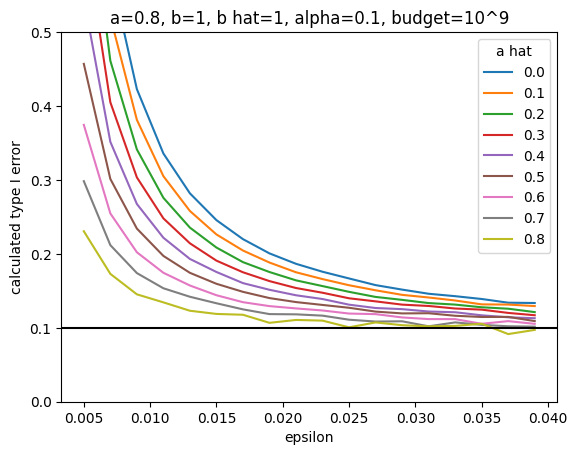

In [7]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(1,1)

x=9
budget=10**x
alpha=0.1
b_hat=1
a_hat_list = [i/10 for i in range(9)] 
for a_hat in a_hat_list:
    validity_check_list = [check_validity_condition(eps, alpha, budget, a_hat, b_hat, return_val=True) for eps in eps_search_list]
    val_list = [v[1] for v in validity_check_list]
    print(val_list)

    ax.plot(eps_search_list, val_list, label=a_hat)

ax.legend(title='a hat')
ax.set_xlabel('epsilon')
ax.set_title(f'a={a}, b={b}, b hat={b_hat}, alpha={alpha}, budget=10^{x}')
ax.set_ylabel('calculated type I error')
ax.set_ylim(0, 0.5)
ax.axhline(y=alpha,  c='k')

In [28]:
# Compute across all permissible epsilons
results = Parallel(n_jobs=-1)(delayed(evaluate_epsilon)(eps, alpha, budget) for eps in valid_epsilon_list)
df_bounds = pd.DataFrame(results, columns=["thres", "m", "r", "hhat"])
df_bounds.to_csv("HH_Bounds.csv", index=False)
print(df_bounds)

# Optimal parameters
idx_max = df_bounds["hhat"].idxmax()
eps_star = df_bounds.loc[idx_max, "thres"]
m_star = df_bounds.loc[idx_max, "m"]
r_star = df_bounds.loc[idx_max, "r"]
print("Optimal:", eps_star, m_star, r_star)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}